In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
data = pd.read_csv('water.csv',sep=',')

In [4]:
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


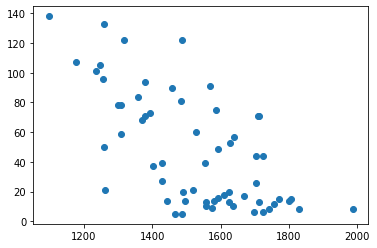

In [5]:
plt.scatter(data.mortality,data.hardness)

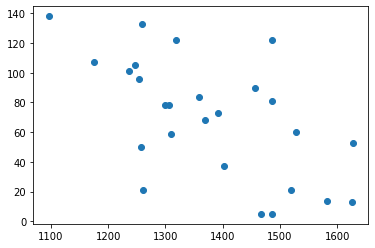

In [31]:
plt.scatter(south.mortality,south.hardness)

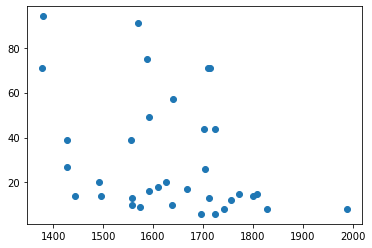

In [33]:
plt.scatter(north.mortality,north.hardness)

In [ ]:
#По указанным выше графикам можно сделать вывод, что жесткость зависит от региона, а сметрность - нет.

In [9]:
print(data[['mortality','hardness']].corr())
print(data[['mortality','hardness']].corr(method='spearman'))

           mortality  hardness
mortality   1.000000 -0.654849
hardness   -0.654849  1.000000
           mortality  hardness
mortality   1.000000 -0.631665
hardness   -0.631665  1.000000


In [35]:
print(south[['mortality','hardness']].corr())
print(south[['mortality','hardness']].corr(method='spearman'))

           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000
           mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000


In [34]:
print(north[['mortality','hardness']].corr())
print(north[['mortality','hardness']].corr(method='spearman'))

           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000
           mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000


In [ ]:
#По приведенным выше коэффициентам видно, что на юге зависимость выше, чем на севере.

In [10]:
Y=data['mortality']
X=data[['hardness']]

In [36]:
Ys=south['mortality']
Xs=south[['hardness']]

In [37]:
Yn=north['mortality']
Xn=north[['hardness']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

In [38]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, Ys, test_size=0.20, random_state=50)

In [39]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, Yn, test_size=0.20, random_state=50)

In [12]:
X_train.shape

(48, 1)

In [40]:
Xs_train.shape

(20, 1)

In [41]:
Xn_train.shape

(28, 1)

In [13]:
y_train.shape

(48,)

In [43]:
yn_train.shape

(28,)

In [42]:
ys_train.shape

(20,)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
models = LinearRegression()
models.fit(Xs_train, ys_train)

LinearRegression()

In [48]:
modeln = LinearRegression()
modeln.fit(Xn_train, yn_train)

LinearRegression()

In [49]:
model.coef_

array([-3.28694405])

In [50]:
models.coef_

array([-2.77461885])

In [51]:
modeln.coef_

array([-1.59039151])

In [16]:
model.intercept_

1676.8049081969461

In [17]:
y_pred = model.predict(X_test)
y_pred

array([1620.92685931, 1657.08324388, 1647.22241173, 1548.61409017,
       1515.74464965, 1443.4318805 , 1410.56243998, 1344.82355894,
       1643.93546768, 1239.64134928, 1430.2841043 , 1223.20662902,
       1275.79773385])

In [52]:
y_preds = models.predict(Xs_test)
y_preds

array([1526.71190683, 1227.05307062, 1227.05307062, 1507.28957485,
       1196.53226323, 1268.67235343])

In [53]:
y_predn = modeln.predict(Xn_test)
y_predn

array([1652.42183623, 1596.75813344, 1631.74674662, 1661.96418528,
       1654.01222774, 1665.14496829, 1650.83144472])

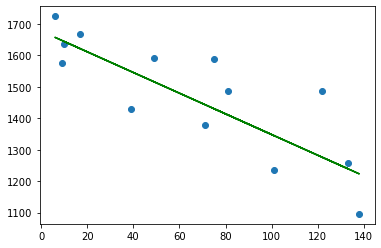

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred,c='g')

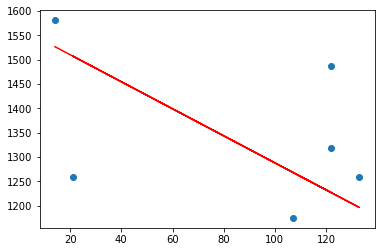

In [54]:
plt.scatter(Xs_test, ys_test)
plt.plot(Xs_test, y_preds,c='r')

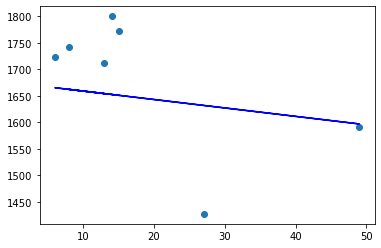

In [55]:
plt.scatter(Xn_test, yn_test)
plt.plot(Xn_test, y_predn,c='b')

In [19]:
print('R2='+str(model.score(X_test, y_test))) 

R2=0.6687741298180702


In [56]:
print('R2='+str(models.score(Xs_test, ys_test))) 

R2=-0.2694806096445346


In [57]:
print('R2='+str(modeln.score(Xn_test, yn_test))) 

R2=0.09844799319177433


In [ ]:
#Можно сделать вывод, что для южных регионов есть небольшая корреляция, а для северных нет (как и отмечалось раннее)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

In [23]:
X_const = sm.add_constant(X_train)

In [58]:
Xs_const = sm.add_constant(Xs_train)

In [59]:
Xn_const = sm.add_constant(Xn_train)

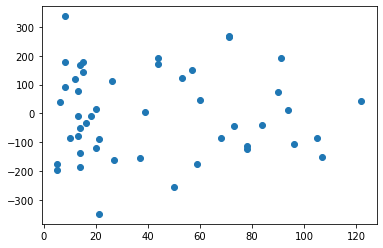

In [25]:
model = sm.OLS(y_train, X_const)
results = model.fit()
plt.scatter(X_const.iloc[:, 1], results.resid)

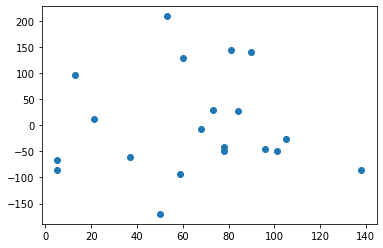

In [60]:
models = sm.OLS(ys_train, Xs_const)
resultss = models.fit()
plt.scatter(Xs_const.iloc[:, 1], resultss.resid)

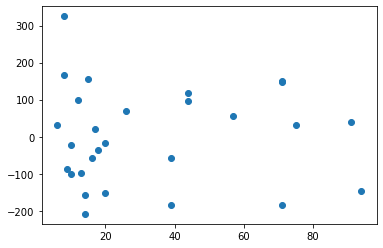

In [61]:
modeln = sm.OLS(yn_train, Xn_const)
resultsn = modeln.fit()
plt.scatter(Xn_const.iloc[:, 1], resultsn.resid)

In [62]:
#Из графиков выбросов можно увидеть, что для южных штатов они расположены хаотично, а в северных прослеживается небольшая зависимость.

In [30]:
south = data[data['location']=='South']

In [32]:
north = data[data['location']=='North']